In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

per_game = 'NBA_2017_2018_Statistics.csv'
per_36min = 'NBA_2017_2018_Statistics_per_36 min.csv'
nba_salary = 'NBA_season17_18_salary.csv'

per_game = pd.read_csv(per_game)
per_36min = pd.read_csv(per_36min)
nba_salary = pd.read_csv(nba_salary)

per_36min = pd.DataFrame(per_36min)
nba_salary = pd.DataFrame(nba_salary)

In [26]:
per_36min_df = pd.merge(per_36min, nba_salary, on= "Player & Team", how="outer")
per_36min_df = per_36min_df.drop(columns=['Player & Team','Player_y', 'Team_y','ORB','DRB',
                                        '3P','3PA','3P%','2P','2PA','2P%'])
per_36min_df = per_36min_df.rename(columns={'Player_x':'Player','Team_x':'Team'})
per_36min_df = per_36min_df.dropna()

#82 games x 48 minutes per game = 3,936 minutes per game 

per_36min_df["Salary per min"] = round(per_36min_df["season17_18"]/3936,2)
per_36min_df["Salary per 36 min"] = per_36min_df["Salary per min"] * 36

#calculate avg. missed field goal attempts

per_36min_df["FGM"] = per_36min_df["FGA"] - per_36min_df["FG"]

#calculate avg. missed free throw attempts

per_36min_df["FTM"] = per_36min_df["FTA"] - per_36min_df["FT"]

#formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

per_36min_df["Player Efficiency Rating"] = per_36min_df["PTS"] + per_36min_df["TRB"] + per_36min_df["TRB"] + per_36min_df["AST"] + per_36min_df["STL"] + per_36min_df["BLK"] - per_36min_df["FGM"] - per_36min_df["FTM"]

per_36min_df.reset_index()

,index,Player,Team,Pos,Age,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,season17_18,Salary per min,Salary per 36 min,FGM,FTM,Player Efficiency Rating
0,0,Aaron Brooks,MIN,PG,33.0,32.0,1.0,189.0,5.3,13.1,...,0.0,2.1,5.3,14.3,2116955.0,537.84,19362.24,7.8,0.6,17.2
1,1,Aaron Gordon,ORL,PF,22.0,58.0,57.0,1909.0,7.1,16.3,...,0.8,2.0,2.1,19.3,5504420.0,1398.48,50345.28,9.2,1.2,30.6
2,4,Abdel Nader,BOS,SF,24.0,48.0,1.0,522.0,3.4,10.3,...,0.7,2.3,3.1,10.1,1167333.0,296.58,10676.88,6.9,1.1,15.4
3,6,Al Horford,BOS,C,31.0,72.0,72.0,2277.0,5.8,11.9,...,1.2,2.1,2.2,14.7,27734405.0,7046.34,253668.24,6.1,0.4,32.3
4,7,Al Jefferson,IND,C,33.0,36.0,1.0,484.0,8.3,15.5,...,1.7,1.6,4.9,18.7,9769821.0,2482.17,89358.12,7.2,0.5,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,535,Zach Collins,POR,C,20.0,66.0,1.0,1045.0,4.0,10.0,...,1.1,2.0,4.6,10.1,3057240.0,776.74,27962.64,6.0,0.5,22.3
376,536,Zach LaVine,CHI,SG,22.0,24.0,24.0,656.0,7.5,19.5,...,0.2,2.4,3.0,22.0,3202217.0,813.57,29288.52,12.0,1.1,24.8
377,537,Zach Randolph,SAC,PF,36.0,59.0,57.0,1508.0,8.6,18.2,...,0.2,2.8,2.8,20.5,12307692.0,3126.95,112570.20,9.6,0.6,33.5
378,538,Zaza Pachulia,GSW,C,33.0,69.0,57.0,972.0,5.5,9.8,...,0.6,2.7,4.5,13.8,3477600.0,883.54,31807.44,4.3,0.6,38.7


In [32]:
#Games Played
avg = per_36min_df['G'].mean()

quartiles = per_36min_df['G'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'Average games played is {avg}')
print(quartiles)
print(iqr)

Values below -6.25 could be outliers.
Values above 123.75 could be outliers.
Average games played is 57.27968337730871
0.25    42.5
0.50    65.0
0.75    75.0
Name: G, dtype: float64
32.5


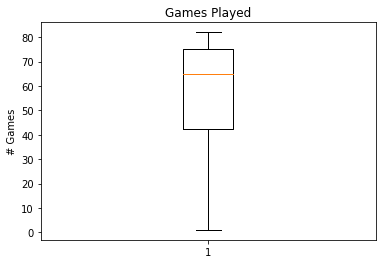

In [33]:
count_games = per_36min_df['G']
fig, ax = plt.subplots()
ax.set_title('Games Played')
ax.set_ylabel('# Games')
ax.boxplot(count_games)
plt.show()

In [34]:
bins = [ 0 , 11 , 21 , 31 , 41 , 51 , 61 , 71,  83]
group_names = ['0 - 10 games' , '10 - 20 games' , '20 - 30 games' , '30 - 40 games', '40 - 50 games', '50 - 60  games', '60 - 70', '70 or more games']

per_36min_df["Game Bins"] = pd.cut(per_36min_df["G"], bins, labels=group_names, include_lowest=True)
games_group = per_36min_df.groupby(["Game Bins"])
games_bins = games_group['G'].count()
games_bins

Game Bins
0 - 10 games         19
10 - 20 games        28
20 - 30 games        21
30 - 40 games        25
40 - 50 games        18
50 - 60  games       56
60 - 70              67
70 or more games    145
Name: G, dtype: int64

In [3]:
#['Player''Team''MP', 'FG', 'FGA','FGM','FT', 'FTA','FTM','TRB', 'AST', 'STL', 'BLK', 'TOV','PTS',
#'season17_18', 'Salary per min', 'Salary per 36 min']


In [44]:
per_36min_df = per_36min_df[['Player','Team','MP','G','season17_18','Salary per 36 min','Player Efficiency Rating']]
per_36min_df['Player Efficiency/ Yearly Salary'] =per_36min_df['Player Efficiency Rating'] / per_36min_df['season17_18'] * 1000
per_36min_df = per_36min_df.loc[per_36min_df['G'] >= 30]
per_36min_df = per_36min_df.sort_values(['season17_18'], ascending=False)
per_36min_df

,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,39.8,0.001148
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,44.4,0.001334
417,Paul Millsap,DEN,1143.0,38.0,31269231.0,285999.12,29.9,0.000956
314,Kyle Lowry,TOR,2510.0,78.0,28703704.0,262533.96,31.6,0.001101
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,43.8,0.001535
...,...,...,...,...,...,...,...,...
460,Sindarius Thornwell,LAC,1156.0,73.0,815615.0,7459.92,16.9,0.020721
231,Jawun Evans,LAC,778.0,48.0,815615.0,7459.92,17.0,0.020843
497,Trey Burke,NYK,785.0,36.0,784160.0,7172.28,27.2,0.034687
503,Tyler Cavanaugh,ATL,518.0,39.0,729919.0,6676.20,26.9,0.036853


In [36]:
Top25_Salaries = per_36min_df.sort_values(['season17_18'], ascending=False)
Top25_Salaries.head(25)

,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
465,Stephen Curry,GSW,1631.0,51.0,34682550.0,317218.32,39.8,0.001148
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,44.4,0.001334
417,Paul Millsap,DEN,1143.0,38.0,31269231.0,285999.12,29.9,0.000956
314,Kyle Lowry,TOR,2510.0,78.0,28703704.0,262533.96,31.6,0.001101
445,Russell Westbrook,OKC,2914.0,80.0,28530608.0,260950.68,43.8,0.001535
216,James Harden,HOU,2551.0,72.0,28299399.0,258836.04,40.6,0.001435
114,DeMar DeRozan,TOR,2711.0,80.0,27739975.0,253719.36,28.2,0.001017
6,Al Horford,BOS,2277.0,72.0,27734405.0,253668.24,32.3,0.001165
65,Carmelo Anthony,OKC,2501.0,78.0,26243760.0,240034.32,23.4,0.000892
88,Damian Lillard,POR,2670.0,73.0,26153057.0,239204.88,31.8,0.001216


In [45]:
per_36min_df['season17_18'].mean()

7921785.022151899

In [37]:
Top25_Efficiency = per_36min_df.sort_values(['Player Efficiency Rating'], ascending=False)
Top25_Efficiency.head(25)

,Player,Team,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
19,Andre Drummond,DET,2625.0,78.0,23775506.0,217458.72,49.1,0.002065
182,Hassan Whiteside,MIA,1364.0,54.0,23775506.0,217458.72,48.9,0.002057
153,Enes Kanter,NYK,1830.0,71.0,20566802.0,188111.16,47.6,0.002314
115,DeMarcus Cousins,NOP,1737.0,48.0,18063850.0,165218.04,47.6,0.002635
252,Joel Embiid,PHI,1912.0,63.0,6100266.0,55794.96,47.5,0.007787
109,DeAndre Jordan,LAC,2424.0,77.0,22642350.0,207094.68,47.0,0.002076
29,Anthony Davis,NOP,2727.0,75.0,23775506.0,217458.72,45.8,0.001926
75,Clint Capela,HOU,2034.0,74.0,2334520.0,21352.32,45.0,0.019276
325,LeBron James,CLE,3026.0,82.0,33285709.0,304442.64,44.4,0.001334
143,Dwight Howard,CHO,2463.0,81.0,23500000.0,214939.08,43.9,0.001868


In [38]:
per_36min_df['Player Efficiency Rating'].mean()

26.20379746835446

In [42]:
#Salaries
avg_salary = per_36min_df['season17_18'].mean()

quartiles_salary = per_36min_df['season17_18'].quantile([.25,.5,.75])
lowerq_salary = quartiles_salary[0.25]
upperq_salary = quartiles_salary[0.75]
iqr_salary = upperq_salary-lowerq_salary

lower_bound_salary = lowerq_salary - (1.5*iqr_salary)
upper_bound_salary = upperq_salary + (1.5*iqr_salary)
print(f"Values below {lower_bound_salary} could be outliers.")
print(f"Values above {upper_bound_salary} could be outliers.")
print(f'Average salary is {avg_salary}')
print(quartiles_salary)
print(iqr_salary)

Values below -14524699.0 could be outliers.
Values above 28928987.0 could be outliers.
Average salary is 7921785.022151899
0.25     1770433.25
0.50     4398400.00
0.75    12633854.75
Name: season17_18, dtype: float64
10863421.5


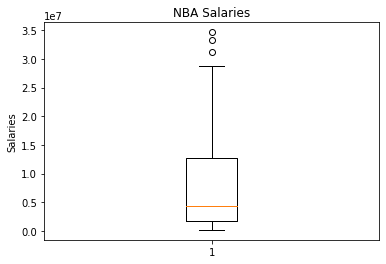

In [47]:
count_salary = per_36min_df['season17_18']
fig, ax = plt.subplots()
ax.set_title('NBA Salaries')
ax.set_ylabel('Salaries')
ax.boxplot(count_salary)
plt.show()

In [48]:
salary_outliers = per_36min_df.loc[per_36min_df['season17_18'] >= 12633854.75]
salary_outliers['Player'].count()

79

In [51]:
#Efficiency
avg_efficiency = per_36min_df['Player Efficiency Rating'].mean()

quartiles_efficiency = per_36min_df['Player Efficiency Rating'].quantile([.25,.5,.75])
lowerq_efficiency = quartiles_efficiency[0.25]
upperq_efficiency = quartiles_efficiency[0.75]
iqr_efficiency = upperq_efficiency-lowerq_efficiency

lower_bound_efficiency = lowerq_efficiency - (1.5*iqr_salary)
upper_bound_efficiency = upperq_efficiency + (1.5*iqr_salary)
print(f"Values below {lower_bound_efficiency} could be outliers.")
print(f"Values above {upper_bound_efficiency} could be outliers.")
print(f'Average efficicency is {avg_efficiency}')
print(quartiles_efficiency)
print(iqr_efficiency)

Values below -16295111.975 could be outliers.
Values above 16295163.75 could be outliers.
Average efficicency is 26.20379746835443
0.25    20.275
0.50    25.050
0.75    31.500
Name: Player Efficiency Rating, dtype: float64
11.225000000000012


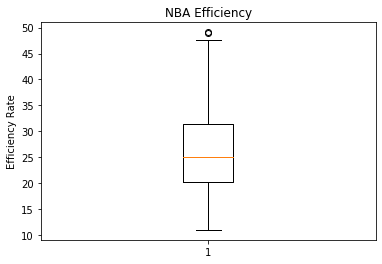

In [54]:
count_efficiency = per_36min_df['Player Efficiency Rating']
fig, ax = plt.subplots()
ax.set_title('NBA Efficiency')
ax.set_ylabel('Efficiency Rate')
ax.boxplot(count_efficiency)
plt.show()

In [58]:
by_team = per_36min_df.groupby(['Team']).mean()
by_team

,MP,G,season17_18,Salary per 36 min,Player Efficiency Rating,Player Efficiency/ Yearly Salary
Team,,,,,,
ATL,1391.727273,61.272727,5.966158e+06,54568.538182,26.045455,0.011628
BOS,1463.846154,63.230769,6.162006e+06,56359.800000,24.800000,0.010020
BRK,1683.500000,66.600000,6.455059e+06,59040.144000,26.700000,0.010967
CHI,1637.100000,65.900000,4.215757e+06,38558.808000,25.580000,0.010477
CHO,1576.416667,66.666667,9.522342e+06,87094.650000,24.716667,0.005943
CLE,1466.111111,63.888889,1.131352e+07,103477.400000,28.400000,0.006676
DAL,1559.818182,64.636364,6.368259e+06,58246.265455,27.081818,0.024650
DEN,1657.222222,64.666667,9.314364e+06,85192.320000,26.755556,0.005997
DET,1439.444444,63.555556,7.146598e+06,65365.200000,25.833333,0.007277


In [ ]:
# per table above New Orleans played a season with players being injured and/or team did not have depth